In [1]:
import requests
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def nba_team(nbateamname):
    nba = requests.get('https://en.wikipedia.org/wiki/National_Basketball_Association').text
    teamlink = re.findall(r'<td><b><a href="(\/\w+\/\w+)"', nba)
    teamlink2 = re.findall(r'<td><b><a href=".+?title="(\w+.+)"', nba)
    data_tuples = dict(zip(teamlink2,teamlink))
    #nbateamlist = pd.DataFrame(data_tuples, columns=['Team','URL'])
    #nbateamlist.set_index('Team')
    return data_tuples[nbateamname]

In [3]:
#nba_team('Boston Celtics') testing

In [4]:
def nbaPlayer(nbateamname):
    nba = requests.get('https://en.wikipedia.org/wiki/National_Basketball_Association').text
    teamlink = re.findall(r'<td><b><a href="(\/\w+\/\w+)"', nba) #every teams link
    teamlink2 = re.findall(r'<td><b><a href=".+?title="(\w+.+)"', nba)
    data_tuples = dict(zip(teamlink2,teamlink))
    teamname = data_tuples[nbateamname]
    gototeam = requests.get('https://en.wikipedia.org' + teamname).text 
    playersinfo = re.findall(r'<td style="text-align:left;"><a href="(.+)"(?: title=".+>\w+\,.+)', gototeam)
    
    info = requests.get('https://en.wikipedia.org' + playersinfo[10]).text
    # Listed height
    height = re.findall(r'Listed height</th><td class="infobox-data">(\w.+m\))', info)
    #Nationality
    nationality = re.findall(r'Nationality</th><td class="infobox-data">(\w+)',info)
     # Position
    position = re.findall(r'<th .*?>Position.*?title="(\w+.+?)"', info)
    #Listed weight
    weight = re.findall(r'Listed weight<.*?">(\w.+kg\))', info)
    # Born 
    born = re.findall(r'Born<.*?> \(.*?\) <\/.*?>(.+?)<span', info)                            
    newlinklist = []
    for i in range(len(playersinfo)):
        url = 'https://en.wikipedia.org' + playersinfo[i]
        newlinklist.append(url)
    result = []
    for i in range(len(newlinklist)):
        info = requests.get(newlinklist[i]).text
        result.append(re.search(r'<h1 id="firstHeading" class="firstHeading" >(.*?)</h1>',info).group(1))
        result.append(re.sub(r'&#160;','',re.findall(r'Listed height</th><td class="infobox-data">(\w.+m\))', info)[0]))
        result.append(re.search(r'Nationality</th><td class="infobox-data">(\w+)',info).group(1))
        result.append(re.search(r'<th .*?>Position.*?title="(\w+.+?)"', info).group(1))
        result.append(re.sub(r'&#160;','',re.findall(r'Listed weight<.*?">(\w.+kg\))', info)[0]))
        result.append(re.search(r'Born<.*?> \(.*?\) <\/.*?>(.+?)<span', info).group(1))
    namelist = []
    heightlist =[]
    nationalitylist = []
    positionlist = []
    weightlist = []
    bornlist = []


    for i in range(len(result))[0::6]:
        first = result[i]
        namelist.append(first)

        second = result[i+1]
        heightlist.append(second)  

        third = result[i+2]
        nationalitylist.append(third)

        fourth = result[i+3]
        positionlist.append(fourth)

        fifth = result[i+4]
        weightlist.append(fifth)

        sixth = result[i+5]
        bornlist.append(sixth)
    d = {'Height': heightlist , 'Weight' : weightlist, 'Position': positionlist, 'Birthdate': bornlist, 'Nationality':nationalitylist}
    df = pd.DataFrame(data=d, index= namelist)
    
    return df

In [7]:
nbaPlayer('Boston Celtics') #Testing

Height         Weight  \
Jaylen Brown                   6ft 6in (1.98m)  223lb (101kg)   
Carsen Edwards                5ft 11in (1.80m)   200lb (91kg)   
Tacko Fall                     7ft 5in (2.26m)  311lb (141kg)   
Evan Fournier                  6ft 7in (2.01m)   205lb (93kg)   
Luke Kornet                    7ft 2in (2.18m)  250lb (113kg)   
Romeo Langford                 6ft 4in (1.93m)   216lb (98kg)   
Aaron Nesmith                  6ft 5in (1.96m)   215lb (98kg)   
Semi Ojeleye                   6ft 6in (1.98m)  240lb (109kg)   
Jabari Parker                  6ft 8in (2.03m)  245lb (111kg)   
Payton Pritchard               6ft 1in (1.85m)   195lb (88kg)   
Marcus Smart                   6ft 3in (1.91m)  222lb (101kg)   
Jayson Tatum                   6ft 8in (2.03m)   210lb (95kg)   
Tristan Thompson               6ft 9in (2.06m)  254lb (115kg)   
Kemba Walker                   6ft 0in (1.83m)   184lb (83kg)   
Tremont Waters                5ft 10in (1.78m)   175lb (79kg)   
Grant Williams (basketball)    6ft 6in (1.98m)  236lb (107kg)   
Robert Williams (basketball)   6ft 8in (2.03m)  237lb (108kg)   

                                                Position          Birthdate  \
Jaylen Brown                              Shooting guard   October 24, 1996   
Carsen Edwards                               Point guard     March 12, 1998   
Tacko Fall                           Center (basketball)  December 10, 1995   
Evan Fournier                             Shooting guard    29 October 1992   
Luke Kornet                   Power forward (basketball)      July 15, 1995   
Romeo Langford                            Shooting guard   October 25, 1999   
Aaron Nesmith                             Shooting guard   October 16, 1999   
Semi Ojeleye                  Power forward (basketball)   December 5, 1994   
Jabari Parker                 Power forward (basketball)     March 15, 1995   
Payton Pritchard                             Point guard   January 28, 1998   
Marcus Smart                              Shooting guard      March 6, 1994   
Jayson Tatum                               Small forward      March 3, 1998   
Tristan Thompson                     Center (basketball)     March 13, 1991   
Kemba Walker                                 Point guard        May 8, 1990   
Tremont Waters                               Point guard   January 10, 1998   
Grant Williams (basketball)   Power forward (basketball)  November 30, 1998   
Robert Williams (basketball)  Power forward (basketball)   October 17, 1997   

                             Nationality  
Jaylen Brown                    American  
Carsen Edwards                  American  
Tacko Fall                    Senegalese  
Evan Fournier                     French  
Luke Kornet                     American  
Romeo Langford                  American  
Aaron Nesmith                   American  
Semi Ojeleye                    American  
Jabari Parker                   American  
Payton Pritchard                American  
Marcus Smart                    American  
Jayson Tatum                    American  
Tristan Thompson                Canadian  
Kemba Walker                    American  
Tremont Waters                  American  
Grant Williams (basketball)     American  
Robert Williams (basketball)    American

# Descriptive Analysis of Players Weight and Height

In [6]:
def nbaPlayerStat(df):
    height = []
    weight = []
    for i in range(len(df["Height"])):
        a = re.findall(r'[(](.*?)[)]', df["Height"][i]) 
        b = re.findall(r"\d+\.?\d*",a[0])
        height.append(float(b[0]))
        
        
        c = re.findall(r"\d+\.?\d*",df["Weight"][i])
        weight.append(float(c[1]))
        #This function use kg as weight unit, if users want to use lb as the unit, change c[1] to c[0]
        
    
    height_avg = np.mean(height)
    height_var = np.var(height)
    
    weight_avg = np.mean(weight)
    weight_var = np.var(weight)  
    
    stat = {'Average Height': height_avg, 'Height Variance': height_var,
           'Average Weight' :weight_avg, 'Weight Variance' :weight_var}
    
    return stat
    

In [7]:
nbaPlayerStat(nbaPlayer('Boston Celtics'))

{'Average Height': 1.9764705882352942,
 'Height Variance': 0.014858131487889262,
 'Average Weight': 101.82352941176471,
 'Weight Variance': 198.38062283737028}

## Graph visualization

In [104]:
def nbaHeight_graph(df):
    height = []
    weight = []
    for i in range(len(df["Height"])):
        a = re.findall(r'[(](.*?)[)]', df["Height"][i]) 
        b = re.findall(r"\d+\.?\d*",a[0])
        height.append(float(b[0]))
        
        
        c = re.findall(r"\d+\.?\d*",df["Weight"][i])
        weight.append(float(c[1]))
        #This function use kg as weight unit, if users want to use lb as the unit, change c[1] to c[0]
    x = np.arange(len(height))    
        
    height_avg = np.mean(height)
    height_var = np.var(height)
    weight_avg = np.mean(weight)
    weight_var = np.var(weight) 
    
    avg = [height_avg]*len(height)
    avg1 = [weight_avg]*len(height)

    
    plt.plot(x,height,marker ='o',color = 'black')
    plt.plot(x,avg,color = 'red')
    plt.ylabel("Height(m)")
    plt.title('Players\' Height Information').set_weight('bold')
    plt.legend(["Players' Height",'Players\' Average Height'])
    plt.grid('on')

    return plt.show()

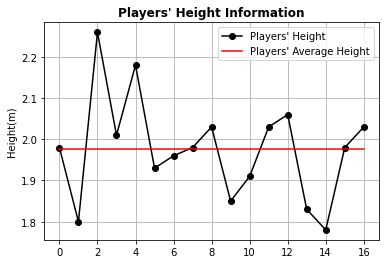

In [105]:
nbaHeight_graph(nbaPlayer('Boston Celtics'))

In [106]:
def nbaWeight_graph(df):
    height = []
    weight = []
    for i in range(len(df["Height"])):
        a = re.findall(r'[(](.*?)[)]', df["Height"][i]) 
        b = re.findall(r"\d+\.?\d*",a[0])
        height.append(float(b[0]))
        
        
        c = re.findall(r"\d+\.?\d*",df["Weight"][i])
        weight.append(float(c[1]))
        #This function use kg as weight unit, if users want to use lb as the unit, change c[1] to c[0]
    x = np.arange(len(height))    
        
    height_avg = np.mean(height)
    height_var = np.var(height)
    weight_avg = np.mean(weight)
    weight_var = np.var(weight) 
    
    avg = [height_avg]*len(height)
    avg1 = [weight_avg]*len(height)
    
    plt.plot(x,weight,marker ='o',color = 'black')
    plt.plot(x,avg1, color ='green')
    plt.ylabel("Weight(kg)")
    plt.title('Players\' Weight Information').set_weight('bold')
    plt.legend(["Players' Weight",'Players\' Average Weight'])
    plt.grid('on')
    
    return plt.show()

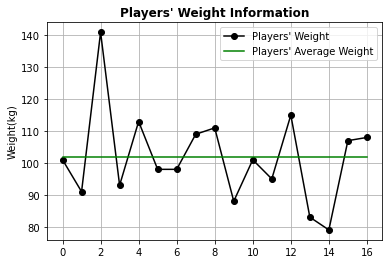

In [107]:
nbaWeight_graph(nbaPlayer('Boston Celtics'))